# Topic Modeling — Time Series

In these lessons, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts or  single text that has been separated into smaller text chunks.

## Dataset

### Trump's Tweets

<blockquote class="epigraph" style=" padding: 10px">

I hear that Fake News CNN just reported that I am isolated in the White House wondering out loud “when will life return to normal?” Does anybody really believe that?

<p class ="attribution">
    —Donald Trump, <a href="https://twitter.com/realdonaldtrump/status/1242929613262725122?lang=en">March 25, 2020 tweet</a>
    </p>
    
</blockquote>

In this particular lesson, we're going to use [Little MALLET Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), a Python wrapper for [MALLET](http://mallet.cs.umass.edu/topics.php), to topic model a CSV file of Donald Trump's tweets and plot the fluctuation of topics over time. The Trump tweets dataset is downloaded from [The Trump Twitter Archive](https://www.thetrumparchive.com/).

___

<div class="admonition attention" name="html-admonition" style="background: lightyellow;padding: 10px">  
<p class="title">Attention</p>  
    
<p>If you're working in this Jupyter notebook on your own computer, you'll need to have both the Java Development Kit and MALLET pre-installed. For set up instructions, please see <a href="http://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/Topic-Modeling-Set-Up.html">the previous lesson<a/>.  </p>
    
If you're working in this Jupyter notebook in the cloud via Binder, then the Java Development Kit and Mallet will already be installed. You're good to go!  
     
</div>  

## Set MALLET Path

Since Little MALLET Wrapper is a Python package built around MALLET, we first need to tell it where the bigger, Java-based MALLET lives.

We're going to make a variable called `path_to_mallet` and assign it the file path of our MALLET program. We need to point it, specifically, to the "mallet" file inside the "bin" folder inside the "mallet-2.0.8" folder. 

In [1]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

If MALLET is located in another directory, then set your `path_to_mallet` to that file path.

## Install Packages

In [ ]:
!pip install little_mallet_wrapper
!pip install seaborn

## Import Packages

Now let's `import` the `little_mallet_wrapper` and the data viz library `seaborn`.

In [3]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system, as well as pandas for working with the CSV data.

## Get Training Data From CSV File

Before we topic model Donald Trump's tweets, we need to process the tweets and prepare them for analysis. The steps below demonstrate how to process texts if they come from a CSV file.

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
<p class="title">Note</p>   
We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.
    
</div>

## Trump Tweets

This dataset of Donald Trump's tweets is taken from [Trump Twitter Archive](http://www.trumptwitterarchive.com/). To read in the CSV file, we're going to use Pandas.

<div class="admonition pandasreview" name="html-admonition" style="background: black; color: white; padding: 10px">
<p class="title">Pandas</p>
 Do you need a refresher or introduction to the Python data analysis library Pandas? Be sure to check out <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Analysis/Pandas-Basics-Part1.html"> Pandas Basics (1-3) </a> in this textbook!
    
</div>

In [4]:
trump_df = pd.read_csv("../texts/social-media/Trump-Tweets_2009-2021.csv", encoding='utf-8')

In [5]:
trump_df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,1.347570e+18,"To all of those who have asked, I will not be going to the Inauguration on January 20th.",f,f,Twitter for iPhone,510761,83532,1/8/21 15:44,f
1,1.347560e+18,"The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT A...",f,f,Twitter for iPhone,480997,108844,1/8/21 14:46,f
2,1.347330e+18,https://t.co/csX07ZVWGe,f,f,Twitter Media Studio,629326,154877,1/8/21 0:10,f
3,1.346950e+18,These are the things and events that happen when a sacred landslide election victory is so uncer...,f,f,Twitter for iPhone,0,0,1/6/21 23:01,f
4,1.346930e+18,https://t.co/Pm2PKV0Fp3,f,f,Twitter for iPhone,0,0,1/6/21 21:17,f


In [6]:
trump_df['text'] = trump_df['text'].astype(str)

### Process Trump Tweets

In [7]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in trump_df['text']]

### Get Original Trump Tweets

In [8]:
original_trump_tweets = [title for title in trump_df['text']]

### Get Dataset Statistics

In [9]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 56571
Mean Number of Words per Document: 12.0
Vocabulary Size: 59952


## Training the Topic Model

We're going to train our topic model with the `little_mallet_wrapper.train_topic_model()` function.

So we have to set a few things up first.

### Set Number of Topics

We need to make a variable `num_topics` and assign it the number of topics we want returned.

In [10]:
num_topics = 35

### Set Training Data

We already made a variable called `training_data`, which includes all of our processed Reddit post texts, so we can just set it equal to itself.

In [11]:
training_data = training_data

### Set Other MALLET File Paths

Then we're going to set a file path where we want all our MALLET topic modeling data to be dumped. I'm going to output everything onto my Desktop inside a folder called "topic-model-output" and a subfolder specific to the Reddit posts called "Reddit."

All the other necessary variables below `output_directory_path` will be automatically created inside this directory.

In [12]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/Trump-Tweets'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

### Train Topic Model

Then we're going to train our topic model with `little_mallet_wrapper.quick_train_topic_model()`. The topic model should take about 1-1.5 minutes to train and complete. If you want it, you can look at your Terminal or PowerShell and see what the model looks like as it's training.

In [17]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                                                     output_directory_path,
                                                                     num_topics,
                                                                     training_data)

Importing data...
Complete
Training topic model...
Complete


([['democrats',
   'impeachment',
   'president',
   'schiff',
   'house',
   'pelosi',
   'nancy',
   'senate',
   'https',
   'nothing',
   'call',
   'adam',
   'dems',
   'jim',
   'said',
   'jordan',
   'whistleblower',
   'ukraine',
   'democrat',
   'realdonaldtrump'],
  ['jobs',
   'economy',
   'record',
   'ever',
   'history',
   'years',
   'market',
   'since',
   'best',
   'time',
   'numbers',
   'year',
   'unemployment',
   'great',
   'stock',
   'high',
   'president',
   'new',
   'economic',
   'https'],
  ['news',
   'fake',
   'media',
   'story',
   'cnn',
   'new',
   'people',
   'nytimes',
   'even',
   'times',
   'never',
   'failing',
   'made',
   'dishonest',
   'bad',
   'york',
   'many',
   'totally',
   'reporting',
   'like'],
  ['realdonaldtrump',
   'trump',
   'president',
   'run',
   'donald',
   'would',
   'need',
   'country',
   'vote',
   'please',
   'america',
   'thanks',
   'needs',
   'great',
   'thank',
   'make',
   'true',
   'm

## Display Topics and Top Words

In [18]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['democrats', 'impeachment', 'president', 'schiff', 'house', 'pelosi', 'nancy', 'senate', 'https', 'nothing', 'call', 'adam', 'dems', 'jim', 'said', 'jordan', 'whistleblower', 'ukraine', 'democrat', 'realdonaldtrump']

✨Topic 1✨

['jobs', 'economy', 'record', 'ever', 'history', 'years', 'market', 'since', 'best', 'time', 'numbers', 'year', 'unemployment', 'great', 'stock', 'high', 'president', 'new', 'economic', 'https']

✨Topic 2✨

['news', 'fake', 'media', 'story', 'cnn', 'new', 'people', 'nytimes', 'even', 'times', 'never', 'failing', 'made', 'dishonest', 'bad', 'york', 'many', 'totally', 'reporting', 'like']

✨Topic 3✨

['realdonaldtrump', 'trump', 'president', 'run', 'donald', 'would', 'need', 'country', 'vote', 'please', 'america', 'thanks', 'needs', 'great', 'thank', 'make', 'true', 'man', 'get', 'one']

✨Topic 4✨

['great', 'realdonaldtrump', 'congratulations', 'team', 'game', 'nfl', 'win', 'http', 'yankees', 'https', 'last', 'time', 'night', 'job', 'guy', 'rod', 'fo

## Display Top Tweets For Topic

## Load Topic Distributions

In [19]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [20]:
tweet_dict = dict(zip(training_data, original_trump_tweets))

In [21]:
def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

In [25]:
display_top_tweets_per_topic(topic_number=1, number_of_documents=5)

✨Topic 1✨

['jobs', 'economy', 'record', 'ever', 'history', 'years', 'market', 'since', 'best', 'time', 'numbers', 'year', 'unemployment', 'great', 'stock', 'high', 'president', 'new', 'economic', 'https']

0.9608 Stock Market up almost 40% since the Election, with 7 Trillion Dollars of U.S. value built throughout the economy. Lowest unemployment rate in many decades, with Black &amp, Hispanic unemployment lowest in History, and Female unemployment lowest in 21 years. Highest confidence ever!

0.9563 “The unemployment rate remains at a 17-year low of 4.1%. The unemployment rate in manufacturing dropped to 2.6%, the lowest ever recorded. The unemployment rate among Hispanics dropped to 4.7%, the lowest ever recorded...”@SecretaryAcosta @USDOL https://t.co/vou28s0yHN

0.9433 Would be sooo great if the Fed would further lower interest rates and quantitative ease. The Dollar is very strong against other currencies and there is almost no inflation. This is the time to do it. Exports would z

## Show Topic Words in Context of Full Tweet

In [23]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):

        probability = f"✨✨✨\n\n**{probability}**"
        original_text = tweet_dict[document]
        original_text_lowered = original_text.lower()
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text_lowered:
                original_text = re.sub(f"\\b{word}\\b", f"**{word.upper()}**", original_text, flags=re.I)

        display(Markdown(probability)), display(Markdown(original_text))
    return

In [26]:
display_bolded_topic_words_in_context(topic_number=1, number_of_documents=4)

✨Topic 1✨

['jobs', 'economy', 'record', 'ever', 'history', 'years', 'market', 'since', 'best', 'time', 'numbers', 'year', 'unemployment', 'great', 'stock', 'high', 'president', 'new', 'economic', 'https']



✨✨✨

**0.9607886969575177**

**STOCK** **MARKET** up almost 40% **SINCE** the Election, with 7 Trillion Dollars of U.S. value built throughout the **ECONOMY**. Lowest **UNEMPLOYMENT** rate in many decades, with Black &amp, Hispanic **UNEMPLOYMENT** lowest in **HISTORY**, and Female **UNEMPLOYMENT** lowest in 21 **YEARS**. Highest confidence **EVER**!

✨✨✨

**0.9562956605511918**

“The **UNEMPLOYMENT** rate remains at a 17-**YEAR** low of 4.1%. The **UNEMPLOYMENT** rate in manufacturing dropped to 2.6%, the lowest **EVER** recorded. The **UNEMPLOYMENT** rate among Hispanics dropped to 4.7%, the lowest **EVER** recorded...”@SecretaryAcosta @USDOL **HTTPS**://t.co/vou28s0yHN

✨✨✨

**0.9433021986807756**

Would be sooo **GREAT** if the Fed would further lower interest rates and quantitative ease. The Dollar is very strong against other currencies and there is almost no inflation. This is the **TIME** to do it. Exports would zoom!

✨✨✨

**0.9433021986807756**

Incredible number just out, 7,036,000 job openings. Astonishing - it’s all working! **STOCK** **MARKET** up big on tremendous potential of USA. Also, Strong Profits. We are Number One in World, by far!

## Plot Topics Over Time

## Load Topic Distributions

In [27]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

## Add Topic Distribution Columns

Add column with all topic distributions for every tweet

In [28]:
trump_df['topic_distributions'] = pd.Series(topic_distributions)

Make a separate dataframe with each topic distribution as a separate column

In [29]:
topic_distributions_df = trump_df['topic_distributions'].apply(pd.Series)

Rename each of those columns with the first four words from the topic

In [30]:
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]

Merge that column into the dataframe

In [31]:
trump_df = pd.concat([trump_df, topic_distributions_df], axis=1)

## Date Formatting For Time Series Plot

**Convert to datetime**

In [34]:
trump_df['date'] = pd.to_datetime(trump_df['date'])

**Extract year**

In [35]:
trump_df['year'] = pd.to_datetime(trump_df['date'].dt.year, format='%Y')

**Extract year and month**

In [36]:
trump_df['year-month'] = trump_df['date'].dt.to_period('M')

In [37]:
trump_df['Date (by month)'] = [month.to_timestamp() for month in trump_df['year-month']]

**Set year and month as Pandas Index**

In [38]:
trump_df = trump_df.set_index('Date (by month)')

## Plot Individual Topics as Time Series

<AxesSubplot:title={'center':'Trump Tweets By Topic: \nBorder Wall Security Immigration'}, xlabel='Date (by month)'>

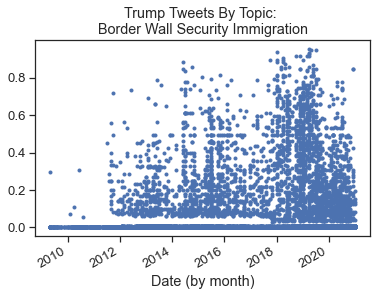

In [45]:
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

trump_df[topic_label].plot(style='.', title=f'Trump Tweets By Topic: \n{topic_label.title()}')

<AxesSubplot:title={'center':'Trump Tweets By Topic: \nBorder Wall Security Immigration'}, xlabel='Date (by month)'>

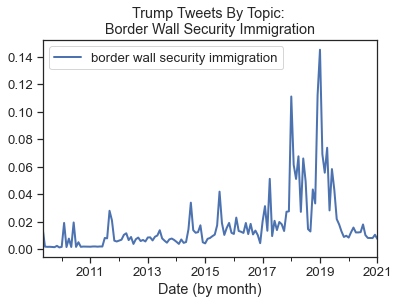

In [46]:
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title=f'Trump Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Trump Tweets By Topic: \nElection Https Vote Votes'}, xlabel='Date (by month)'>

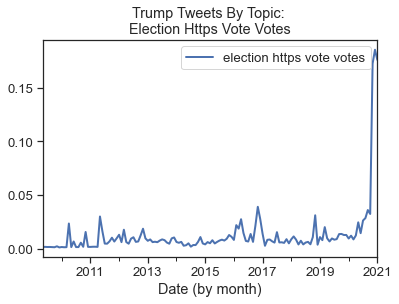

In [54]:
topic_number = 21

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title=f'Trump Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Trump Tweets By Topic: \nFbi Witch Hunt Collusion'}, xlabel='Date (by month)'>

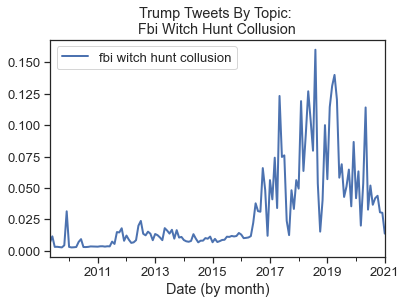

In [55]:
topic_number = 30

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title=f'Trump Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Trump Tweets By Topic: \nCourt Supreme Justice States'}, xlabel='Date (by month)'>

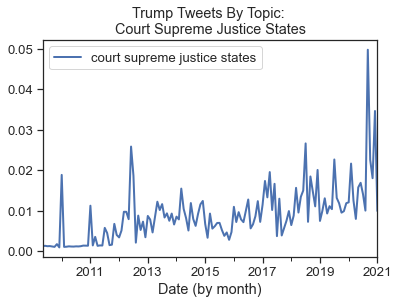

In [57]:
topic_number = 9

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title=f'Trump Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Trump Tweets By Topic: \nBiden Joe Https Sleepy'}, xlabel='Date (by month)'>

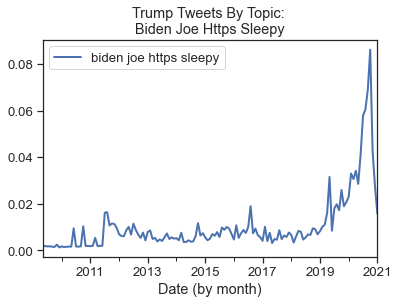

In [58]:
topic_number = 34

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title=f'Trump Tweets By Topic: \n{topic_label.title()}', linewidth=2)

<AxesSubplot:title={'center':'Trump Tweets By Topic: \nChina Trade United States'}, xlabel='Date (by month)'>

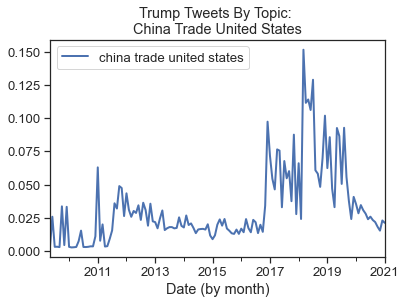

In [59]:
topic_number = 23

topic_label = " ".join(topics[topic_number][:4])

trump_df.groupby(trump_df.index)[[topic_label]].mean().plot(title=f'Trump Tweets By Topic: \n{topic_label.title()}', linewidth=2)